# Machine Learning

*Disclaimer: The contents of this notebook are developped according to Python Data Science Handbook, by Jake VanderPlas and Introduction to Python for Computer Science and Data Science, by Paul Deitel and Harvey Deitel*
    
### Categories of Machine Learning

At the most fundamental level, machine learning can be categorized into two main types: supervised learning and unsupervised learning.

Supervised learning involves somehow modeling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data. This is further subdivided into classification tasks and regression tasks: **in classification, the labels are discrete categories, while in regression, the labels are continuous quantities**.

Unsupervised learning involves modeling the features of a dataset without reference to any label, and is often described as "letting the dataset speak for itself." These models include tasks such as clustering and dimensionality reduction. Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for more succinct representations of the data.

- Supervised learning: Models that can **predict labels** based on labeled training data

> 1. Classification: Models that predict labels as two or more discrete categories
> 2. Regression: Models that predict continuous labels

- Unsupervised learning: Models that **identify structure** in unlabeled data

> 1. Clustering: Models that detect and identify distinct groups in the data
> 2. Dimensionality reduction: Models that detect and identify lower-dimensional structure in higher-dimensional data
    
### Introducing Scikit-Learn

There are several Python libraries which provide solid implementations of a range of machine learning algorithms. One of the best known is Scikit-Learn, a package that provides efficient versions of a large number of common algorithms. Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation. A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

<div>
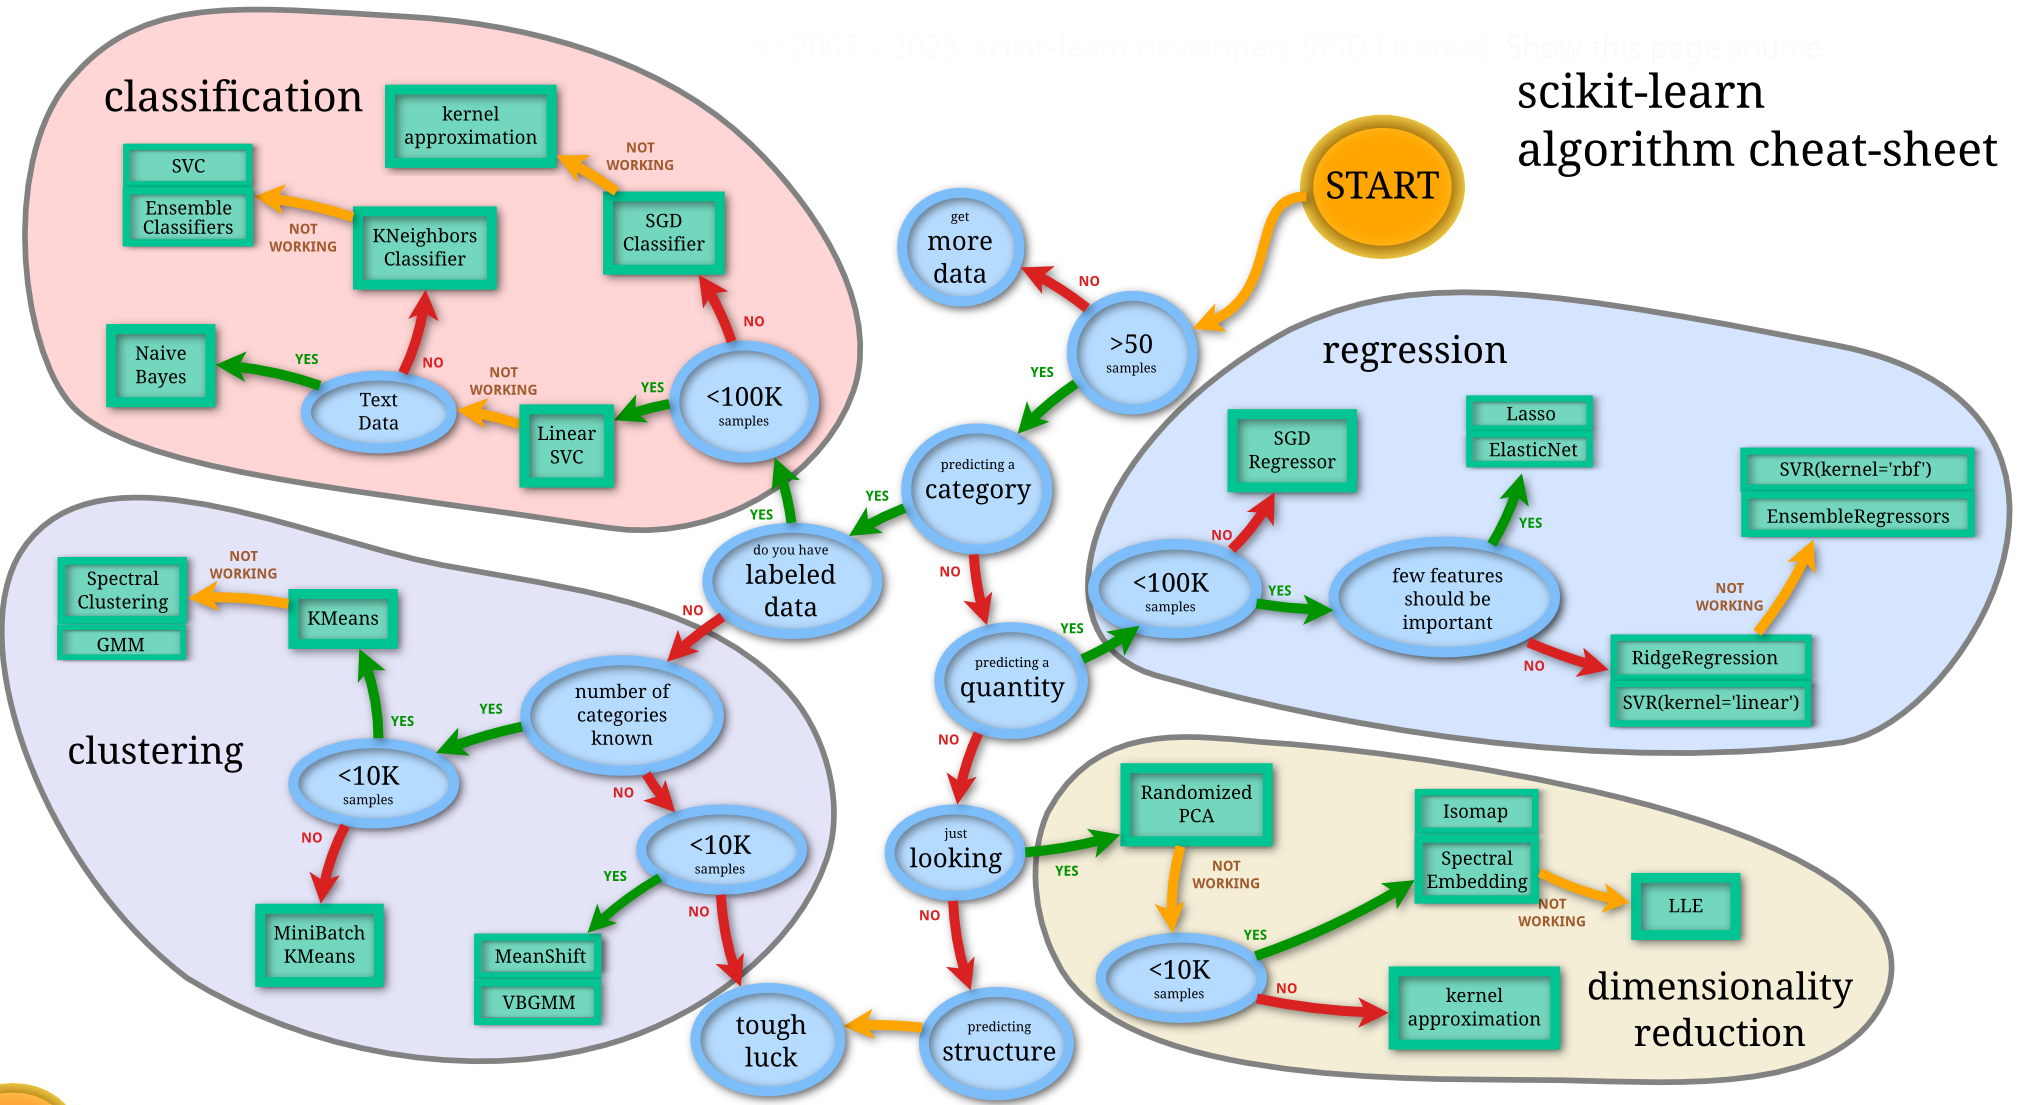
</div>
    
### Data Representation in Scikit-Learn
Machine learning is about creating models from data. The best way to think about data within Scikit-Learn is in terms of tables of data

### Data as Table
A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements. For example, consider the Iris dataset, famously analyzed by Ronald Fisher in 1936. We can download this dataset in the form of a Pandas DataFrame using the seaborn library

In [ ]:
import seaborn as sns
import numpy as np
iris = sns.load_dataset('iris')
iris.head()

Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset. In general, we will refer to the rows of the matrix as **samples**, and the number of rows as `n_samples`.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample. In general, we will refer to the columns of the matrix as **features**, and the number of columns as `n_features`.

### Features Matrix
This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the features matrix. By convention, this features matrix is often stored in a variable named `X`. The features matrix is assumed to be two-dimensional, with shape `(n_samples, n_features)`, and is most often contained in a NumPy `array` or a Pandas `DataFrame`, though some Scikit-Learn models also accept SciPy sparse matrices.

The samples (i.e., rows) always refer to the individual objects described by the dataset. For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner. Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

### Target Array
In addition to the feature matrix `X`, we also generally work with a label or target array, which by convention we will usually call `y`. The target array is usually one dimensional, with length n_samples, and is generally contained in a NumPy `array` or Pandas `Series`. The target array may have continuous numerical values, or discrete classes/labels. While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, `(n_samples, n_targets)` target array, we will primarily be working with the common case of a one-dimensional target array.

Often one point of confusion is how the target array differs from the other features columns. The distinguishing feature of the target array is that it is usually the quantity we want to predict from the data: in statistical terms, it is the dependent variable. For example, in the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the species column would be considered the target array.

With this target array in mind, we can use Seaborn (see Visualization With Seaborn) to conveniently visualize the data

In [ ]:
%matplotlib inline
import seaborn as sns
sns.set()
sns.pairplot(iris, hue = 'species', size = 1.5)

For use in Scikit-Learn, we will extract the features matrix and target array from the `DataFrame`, which we can do using some of the Pandas `DataFrame` operations discussed in the previous chapter

In [ ]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape

In [ ]:
y_iris = iris['species']
y_iris.shape

To summarize, the expected layout of features and target values is visualized in the following diagram

<div>
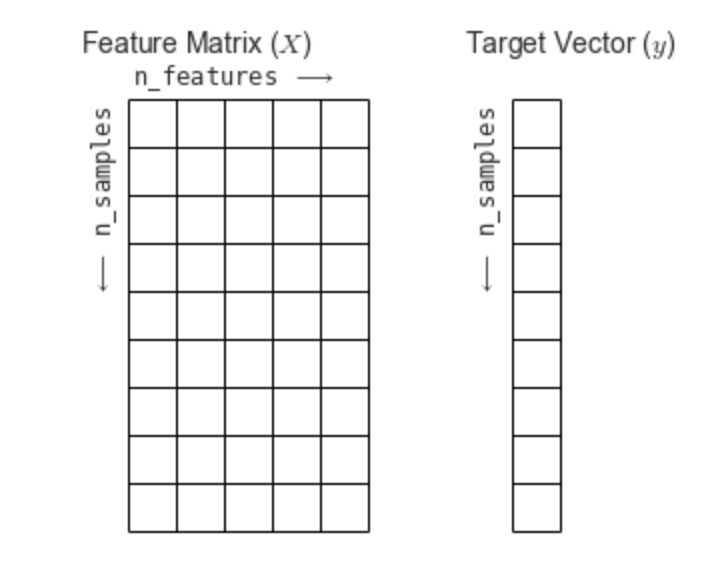
</div>

### Feature Engineering
The previous sections outline the fundamental ideas of machine learning, but all of the examples assume that you have numerical data in a tidy, `(n_samples, n_features)` format. In the real world, data rarely comes in such a form. With this in mind, one of the more important steps in using machine learning in practice is feature engineering: that is, taking whatever information you have about your problem and turning it into numbers that you can use to build your feature matrix

In this section, we will cover a few common examples of feature engineering tasks: features for representing categorical data, features for representing text, etc. Additionally, we will discuss imputation of missing data. Often this process is known as **vectorization, as it involves converting arbitrary data into well-behaved vectors**

### Categorical Features
One common type of non-numerical data is categorical data. For example, imagine you are exploring some data on housing prices, and along with numerical features like `price` and `rooms`, you also have `neighborhood` information. For example, your data might look something like this

In [ ]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

You might be tempted to encode this data with a straightforward numerical mapping

In [ ]:
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3}

It turns out that this is not generally a useful approach in Scikit-Learn: the package's models make the fundamental assumption that numerical features reflect algebraic quantities. Thus such a mapping would imply, for example, that `Queen Anne < Fremont < Wallingford` which does not make much sense

In this case, one proven technique is to use `one-hot` encoding, which effectively creates extra columns indicating the presence or absence of a category with a value of 1 or 0, respectively. When your data comes as a list of dictionaries, Scikit-Learn's `DictVectorizer` will do this for you

The class `DictVectorizer` can be used to convert feature arrays represented as **lists of standard Python dict objects** to the NumPy/SciPy representation used by scikit-learn estimators

`DictVectorizer` implements what is called one-of-K or “one-hot” coding for categorical (aka nominal, discrete) features. Categorical features are “attribute-value” pairs where the value is restricted to a list of discrete of possibilities without ordering (e.g. topic identifiers, types of objects, tags, names…)

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

Notice that the `neighborhood` column has been expanded into three separate columns, representing the three neighborhood labels, and that each row has a 1 in the column associated with its neighborhood. With these categorical features thus encoded, you can proceed as normal with fitting a Scikit-Learn model

To see the meaning of each column, you can inspect the feature names by using `get_feature_names()`

In [ ]:
vec.get_feature_names()

There is one clear disadvantage of this approach: if your category has many possible values, this can greatly increase the size of your dataset. However, because the encoded data contains mostly zeros, a sparse output can be a very efficient solution

In [ ]:
vec = DictVectorizer(sparse=True, dtype=int)
result = vec.fit_transform(data)
result

In [ ]:
print(result)

In [ ]:
result.toarray()

Many (though not yet all) of the Scikit-Learn estimators accept such sparse inputs when fitting and evaluating models. `sklearn.preprocessing.OneHotEncoder` and `sklearn.feature_extraction.FeatureHasher` are two additional tools that Scikit-Learn includes to support this type of encoding

### Text Features
Another common need in feature engineering is to convert text to a set of representative numerical values. For example, most automatic mining of social media data relies on some form of encoding the text as numbers. One of the simplest methods of encoding data is by word counts: you take each snippet of text, count the occurrences of each word within it, and put the results in a table.

For example, consider the following set of three phrases

In [ ]:
# do not count a single letter word
sample = ['problem of evil of problem',
          'a evil queen',    # 'a evil queen'
          'horizon problem']

For a vectorization of this data based on word count, we could construct a column representing the word "problem," the word "evil," the word "horizon," and so on. While doing this by hand would be possible, the tedium can be avoided by using Scikit-Learn's `CountVectorizer()`

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

The result is a sparse matrix recording the number of times each word appears; it is easier to inspect if we convert this to a `DataFrame` with labeled columns

In [ ]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

There are some issues with this approach, however: the raw word counts lead to features which put too much weight on words that appear very frequently, and this can be sub-optimal in some classification algorithms. One approach to fix this is known as term frequency-inverse document frequency (`TF–IDF`) which weights the word counts by a measure of how often they appear in the documents

Term frequency is the relative frequency of the term within document

The inverse document frequency is a measure of how much information the word provides, i.e., if it is common or rare across all documents. It is the logarithmically scaled inverse fraction of the documents that contain the word (obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient)

A high weight in tf–idf is reached by a high term frequency (in the given document) and a low document frequency of the term in the whole collection of documents; **the weights hence tend to filter out common terms**. As a term appears in more documents, the ratio inside the logarithm approaches 1, bringing the idf and tf–idf closer to 0

The syntax for computing these features is similar to the previous example

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

### Numeric Features
Many machine learning algorithms work better when features are on a relatively similar scale and close to normally distributed. `MinMaxScaler`, `StandardScaler`, and `Normalizer` are scikit-learn methods to preprocess data for machine learning. Which method you need, if any, depends on your model type and your feature values

**Scale generally means to change the range of the values. The shape of the distribution doesn’t change**. Think about how a scale model of a building has the same proportions as the original, just smaller. That’s why we say it is drawn to scale. The range is often set at 0 to 1

**Standardize generally means changing the values so that the distribution’s standard deviation equals one**. Scaling is often implied

### `MinMaxScaler`

- For each value in a feature, `MinMaxScaler` subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum
- `MinMaxScaler` preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data
- `MinMaxScaler` doesn’t reduce the importance of outliers
- The default range for the feature returned by MinMaxScaler is 0 to 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = [[90, 2, 10, 40], 
        [60, 4, 15, 45],
        [75, 3, 13, 46]]
mm = MinMaxScaler()
result = mm.fit_transform(data)
result

In [ ]:
mm = MinMaxScaler(feature_range=(2, 3))
result = mm.fit_transform(data)
result

### `StandardScaler`

- `StandardScaler` is the industry’s go-to algorithm
- `StandardScaler` standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation
- `StandardScaler` results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared
- `StandardScaler` makes the mean of the distribution approximately 0

In [ ]:
from sklearn.preprocessing import StandardScaler
data = [[1., -1., 3.], 
        [2., 4., 2.],
        [4., 6., -1.]]
mm = StandardScaler()
result = mm.fit_transform(data)
result

In [ ]:
result.mean(axis=0)

In [ ]:
result.std(axis=0)

In [ ]:
data = [[1., -1., 3.], 
        [2., 4., 2.],
        [4., 6., -1.]]

In [ ]:
np.array(data).mean(axis = 0)

In [ ]:
np.array(data).std(axis = 0)

### Scikit-Learn's Transformer API
Scikit-learn provides a library of transformers. Like other estimators, these are represented by classes with a `fit` method, which learns model parameters (e.g. mean and standard deviation for normalization) from a training set, and a `transform` method which applies this transformation model to unseen data. `fit_transform` may be more convenient and efficient for modelling and transforming the training data simultaneously

### `fit()` vs `transform()` vs `fit_transform()`

In [ ]:
data = [[1., -1., 3.], 
        [2., 4., 2.],
        [4., 6., -1.]]
mm1 = StandardScaler()
mm1.fit(data)

In [ ]:
result1 = mm1.transform(data)
result1

In [ ]:
result1.mean(axis=0)

In [ ]:
result1.std(axis=0)

In [ ]:
data1 = [[1., -1., 3.], 
        [2., 4., 2.],
        [1., 2., 3.]]
mm1.fit(data1)
result1 = mm1.transform(data)
result1

In [ ]:
result1.mean(axis=0)

In [ ]:
result1.std(axis=0)

### Imputation of Missing Data
Another common need in feature engineering is handling of missing data. We discussed the handling of missing data in Pandas DataFrames in Handling Missing Data, and saw that often the `NaN` value is used to mark missing values. For example, we might have a dataset that looks like this

In [ ]:
import numpy as np
X = np.array([[ np.nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   np.nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

When applying a typical machine learning model to such data, we will need to first replace such missing data with some appropriate fill value. This is known as imputation of missing values, and strategies range from simple (e.g., replacing missing values with the mean of the column) to sophisticated (e.g., using matrix completion or a robust model to handle such data).

The sophisticated approaches tend to be very application-specific, and we won't dive into them here. For a baseline imputation approach, using the mean, median, or most frequent value, Scikit-Learn provides the `SimpleImputer` class

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X2 = imp.fit_transform(X)
X2

We see that in the resulting data, the two missing values have been replaced with the mean of the remaining values in the column

### Feature Selection
Feature selection is a method to reduce the variables by using certain criteria to select variables that are most useful to predict the target by our model

Increasing the number of features would help the model to have a good prediction power, but only until a certain point. This is what we called a Curse of Dimensionality, where the model's performance would increase with the higher number of features we used. Still, the performance will deteriorate when the feature number is past the peak. That is why we need to select only the features that are effectively capable of prediction

Feature selection is similar to the dimensionality reduction technique, where the aim is to reduce the number of the features, but fundamentally they are different. **The difference is that feature selection selects features to keep or remove from the dataset, whereas dimensionality reduction creates a projection of the data resulting in entirely new input features**

### Variance Threshold Feature Selection
A feature with a higher variance means that the value within that feature varies or has a high cardinality. On the other hand, lower variance means the value within the feature is similar, and zero variance means you have a feature with the same value

Intuitively, you want to have a varied feature as we don’t want our predictive model to be biased. That is why we could select the feature based on the variance we select previously

A variance Threshold is a simple approach to eliminating features based on our expected variance within each feature. Although, there are some down-side to the Variance Threshold method. The Variance Threshold feature selection only sees the input features (X) without considering any information from the dependent variable (y). **It is only useful for eliminating features for Unsupervised Modelling rather than Supervised Modelling**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
data = [[0, 2, 0, 3],
        [0, 1, 4, 3],
        [0, 1, 1, 3]]
selector = VarianceThreshold(threshold=0)
result = selector.fit_transform(data)
result

In [ ]:
selector.get_support()

In [ ]:
import pandas as pd
import seaborn as sns
mpg = sns.load_dataset('mpg').select_dtypes('number')
mpg.head()

For this example, we only use numerical features for simplicity purposes. We need to transform all of these numerical features before we use the Variance Threshold Feature Selection as the variance is affected by the numerical scale

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mpg = pd.DataFrame(scaler.fit_transform(mpg), columns = mpg.columns)
mpg.head()

With all the features on the same scale, let’s try to select only the features we want using the Variance Threshold method. Let’s limit the variance to one

In [ ]:
selector = VarianceThreshold(1)
selector.fit_transform(mpg)
selector.get_support()

In [ ]:
mpg.columns[selector.get_support()]

It seems only the weight feature are selected based on our Variance Threshold we set. It worth noting that the Variance Threshold only useful when we consider the feature selection for Unsupervised Learning

### Principal Component Analysis (PCA)
PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more

### PCA as Dimensionality Reduction
Using PCA for dimensionality reduction (features reduction) involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance

In [ ]:
from sklearn.decomposition import PCA
data =[[2, 8, 4, 5],
       [6, 3, 0, 8],
       [5, 4, 9, 1]]
pca = PCA(n_components=0.90)
result = pca.fit_transform(data)
result # feature matrix has been changed

### Case Study: Instacart Market Basket Analysis
Which products will an Instacart consumer purchase again

In [ ]:
prior = pd.read_csv('order_products__prior.csv')
prior.head()

In [ ]:
products = pd.read_csv('products.csv')
products.head()

In [ ]:
orders = pd.read_csv('orders.csv')
orders.head()

In [ ]:
aisles = pd.read_csv('aisles.csv')
aisles.head()

In [ ]:
result = pd.merge(prior, products, on='product_id')
result.head()

In [ ]:
result = pd.merge(result, orders, on='order_id')
result.head()

In [ ]:
result = pd.merge(result, aisles, on='aisle_id')
result.head()

In [ ]:
final = pd.crosstab(result['user_id'], result['aisle'])
final.head()

In [ ]:
pca = PCA(n_components=0.90)
data = pca.fit_transform(final)
data.shape

In [ ]:
data

### Preparing the Data for Use with `Scikit-Learn`
* Scikit-learn estimators require samples to be stored in a **two-dimensional array of floating-point values** (or **list of lists** or **pandas `DataFrame`**): 
	* Each **row** represents one **sample** 
	* Each **column** in a given row represents one **feature** for that sample
* Multi-dimensional data samples must be **flattened** into a **one-dimensional array** 
* For **categorical features** (e.g., **strings** like `'spam'` or `'not-spam'`), you’d have to **preprocess** those features into **numerical values**—known as **one-hot encoding**

### Loading Example Dataset
scikit-learn comes with a few standard datasets, for instance the iris and digits datasets for classification and the diabetes dataset for regression. `load` is for small datasets and `fetch` is for big datasets. Both loaders and fetchers functions return a `Bunch` object. `Bunch` is a subclass of `dict` that has additional attributes for interacting with the dataset. The `Bunch` object is a dictionary that exposes its keys as attributes

A dataset is a dictionary-like object that holds all the data and some metadata (information about the dataset) about the data. This data is stored in the `.data` member, which is a `n_samples, n_features` array. In the case of supervised problems, one or more response variables are stored in the `.target` member

### Load iris Dataset

In [ ]:
from sklearn import datasets
# from sklearn.datasets import load_iris()
iris = datasets.load_iris()
# iris = load_iris()
iris

In [ ]:
type(iris)

In [ ]:
iris.keys()

In [ ]:
iris.data

In [ ]:
iris.target

In [ ]:
# dataset description
print(iris.DESCR)

In [ ]:
# feature names
iris.feature_names

In [ ]:
# target names
iris.target_names

### Load 20newsgroup Dataset

- `data_home`: `default=None`, Specify a download and cache folder for the datasets. If `None`, all scikit-learn data is stored in `~/scikit_learn_data` subfolders
- `subset` : `{'train', 'test', 'all'}`, `default=train`, Select the dataset to load: `train` for the training set, `test` for the test set, `all` for both

In [ ]:
from sklearn import datasets
news = datasets.fetch_20newsgroups(subset='all')

In [ ]:
type(news)

In [ ]:
news.keys()

In [ ]:
news.target_names

### Training Set and Testing Set

Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the training set, on which we learn some properties; we call the other set the testing set, on which we test the learned properties. This could be done by hand, but it is more convenient to use the `train_test_split` utility function

By default, `train_test_split` reserves `75%` of the data for training and `25%` for testing. To specify different splits, you can set the sizes of the testing and training sets with the keyword arguments `test_size` or `train_size`. Use floating point values from 0.0 through 1.0 to specify the percentages of the data to use for each

In [ ]:
from sklearn.model_selection import train_test_split
# test_size represent the proportion of the dataset to include in the test split
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 1)

### Confusion Matrix
In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one

<div>
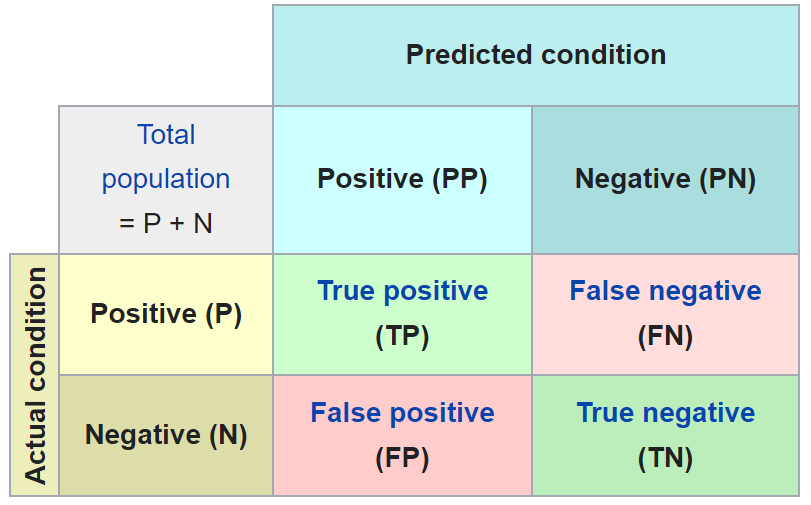
</div>

### Recall, Precision and F1 Score

$$Precision = \frac{TP}{TP + FP}$$
$$Recall = \frac{TP}{TP + FN}$$
$$F_{1} = 2 \frac{Precision \times Recall}{Precision + Recall} = \frac{2TP}{2TP + FP + FN}$$

### Scikit-Learn's Estimator API
Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications

### Basics of the API
Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow).

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the `fit()` method of the model instance.
5. Apply the Model to new data:
> For supervised learning, often we predict labels for unknown data using the `predict()` method.
> For unsupervised learning, we often transform or infer properties of the data using the `transform()` or `predict()` method

### K Nearest Neighbor (KNN)
K Nearest Neighbor (KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. KNN algorithm used for both classification and regression problems. KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. Lazy algorithm means it does not need any training data points for model generation. Lazy learner stores merely the training dataset and waits until classification needs to perform. All training data used in the testing phase. This makes training faster and testing phase slower and costlier

### How KNN Works
In KNN, `K` is the number of nearest neighbors. The number of neighbors is the core deciding factor. **`K` is generally an odd number to avoid a tie**. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the k closest point to P1 and then classify points by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction. For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance

<div>
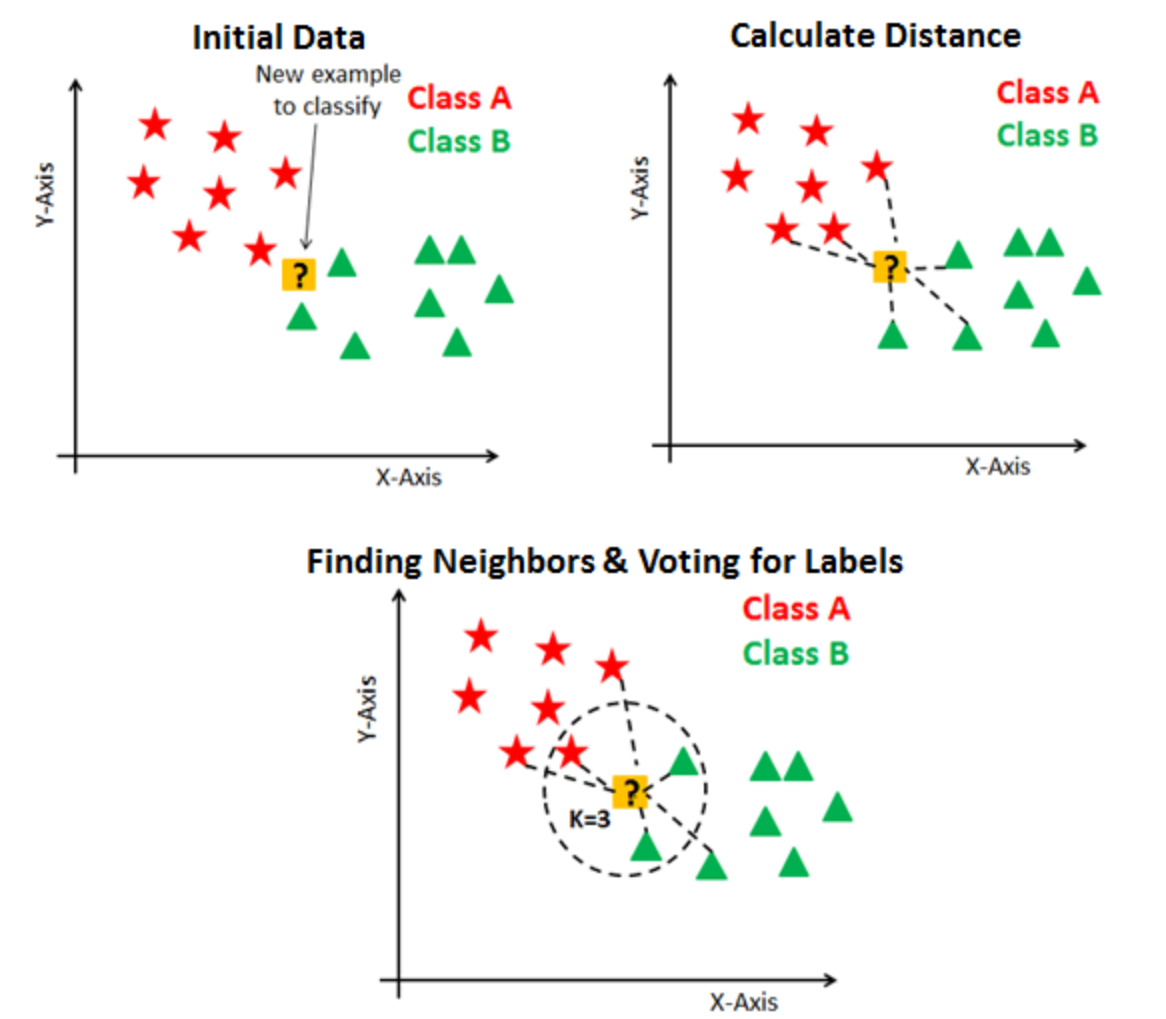
</div>

### Determining the Number of Neighbors in KNN
The number of neighbors (K) in KNN is a hyperparameter that you need choose at the time of model building. You can think of K as a controlling variable for the prediction model. Choosing a `K` will affect what class a new point is assigned to

<div>
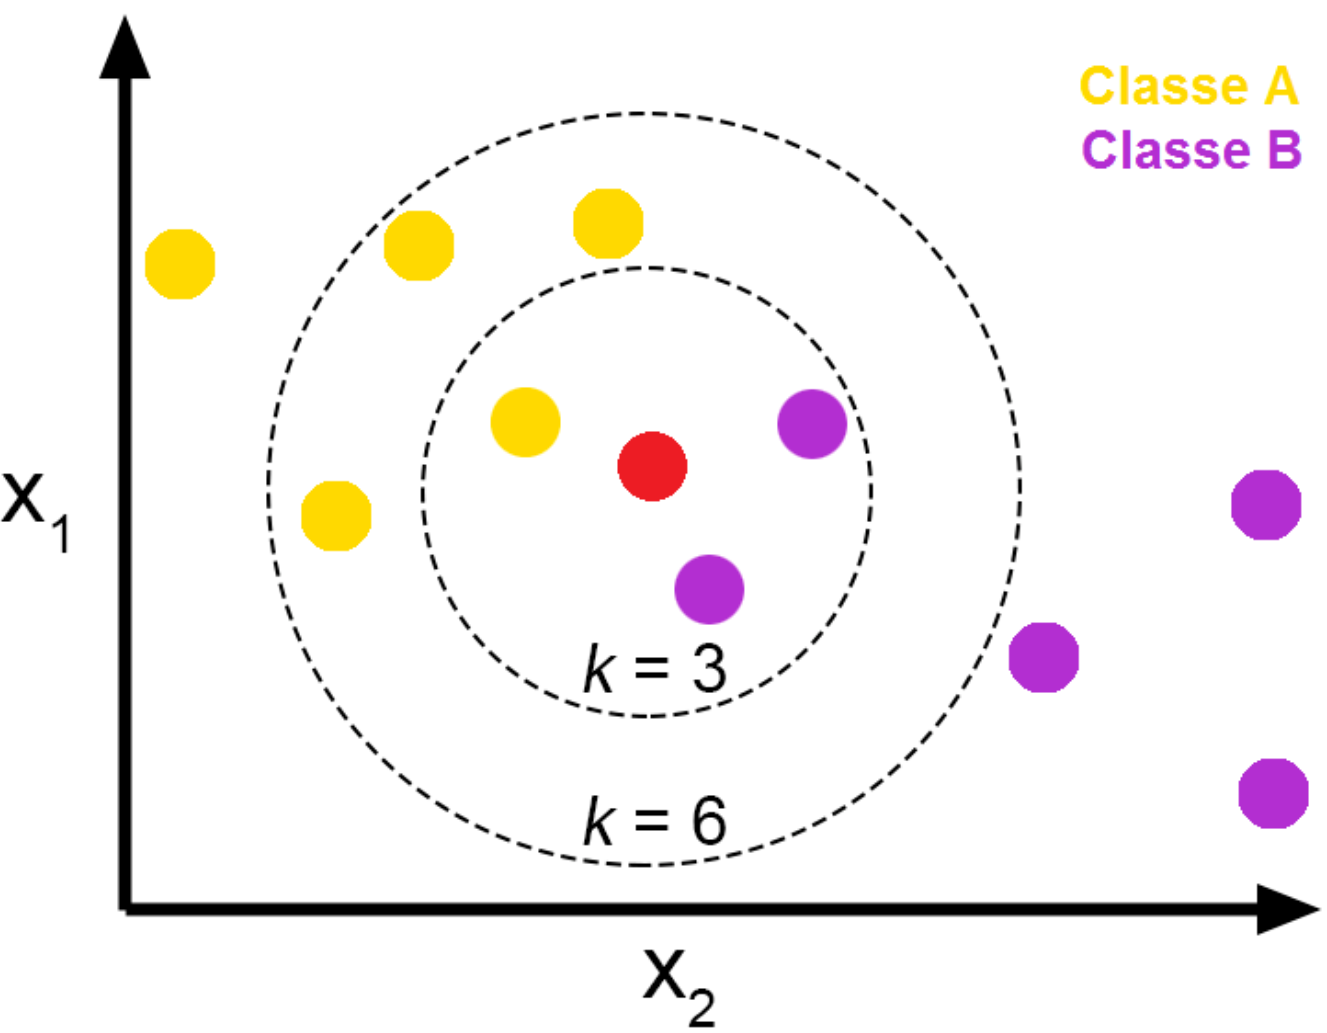
</div>

In the case of a small number of neighbors, the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive. **Typically, an odd number is chosen if the number of classes is even**

### Pros
- Simple! The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms
- Works with any number of classes
- Easy to add more data
- Few parameters: K and distance metric

### Cons
- High prediction cost. The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory
- KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors
- Not good with high dimensional data
- Categorical features do not work well

### Case Study: 

In [ ]:
import pandas as pd
# Set index_col=0 to use the first column as the index
df = pd.read_csv("Classified Data",index_col=0)
df.head()

In [ ]:
df['TARGET CLASS'].value_counts()

### Standardize the Features
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
# scaled_features = scaler.fit_transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.25, random_state=66)

### Applying the KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# fit the k-nearest neighbors classifier from the training dataset
knn.fit(X_train,y_train)

# predict the class labels for the provided data
pred = knn.predict(X_test)

# return the mean accuracy on the given test data and labels
knn.score(X_test, y_test)

In [ ]:
pred

In [ ]:
y_test

In [ ]:
(pred == y_test.values).mean()

### Predictions and Evaluations

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, pred))

In [ ]:
print(classification_report(y_test, pred))

`support` - the number of samples with a given expected value

### Find a K Value

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
error_rate = []

for i in range(1, 30, 2):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    #pred_i = knn.predict(X_test)
    #error_rate.append(np.mean(pred_i != y_test))
    error_rate.append(1 - knn.score(X_test, y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 30, 2), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Case Study: Optical Recognition of Handwritten Digits

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

In [ ]:
print(digits.DESCR)

In [ ]:
digits.data.shape

In [ ]:
digits.target.shape

In [ ]:
digits.target[::100]  # target values of every 100th sample

In [ ]:
digits.images[13]  # show array for sample image at index 13

* `load_digits()` returns the **preprocessed data** ready for machine learning 
* **8-by-8 array `digits.images[13]`** corresponds to **1-by-64 array `digits.data[13]`**

In [ ]:
digits.data[13]

In [ ]:
import matplotlib.pyplot as plt
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

for axes, image, target in zip(axes.ravel(), digits.images, digits.target):
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11)  # random_state for reproducibility

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X=X_train, y=y_train)

In [ ]:
predicted = knn.predict(X=X_test)

In [ ]:
expected = y_test

In [ ]:
predicted[:20]

In [ ]:
expected[:20]

In [ ]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
wrong

In [ ]:
print(f'{knn.score(X_test, y_test):.2%}')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion = confusion_matrix(y_true=y_test, y_pred=predicted)
confusion

### Confusion Matrix
* **Correct predictions** shown on **principal diagonal** from top-left to bottom-right
* **Nonzero values** not on **principal diagonal** indicate **incorrect predictions** 
* Each **row** represents **one distinct class** (0–9) 
* **Columns** specify how many **test samples** were classified into classes 0–9 
* **Row 0** shows digit class **`0`**&mdash;**all 0s were predicted correctly**
>`[45,  0,  0,  0,  0,  0,  0,  0,  0,  0]`
* **Row 8** shows digit class **`8`**&mdash;**five 8s were predicted incorrectly**
>`[ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1]`

    * **Correctly predicted 88.63%** (39 of 44) of `8`s
    * 8s harder to recognize

In [ ]:
print(classification_report(y_test, predicted))

### Visualizing the Confusion Matrix 
* A **heat map** displays **values** as **colors**
* Convert the **confusion matrix** into a **`DataFrame`**, then graph it
* **Principal diagonal** and **incorrect predictions** stand out nicely in **heat map**

In [ ]:
import pandas as pd
import seaborn as sns
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))
figure = plt.figure(figsize=(7, 6))
sns.heatmap(confusion_df, annot=True, 
                   cmap=plt.cm.nipy_spectral_r) 

### K-Fold Cross-Validation
* Uses **all of your data** for **training and testing**
* Gives a better sense of how well your model will make predictions
* **Splits the dataset** into **_k_ equal-size folds** (unrelated to**&nbsp;k** in the k-nearest neighbors algorithm)
* **Repeatedly trains** your model with **_k_ – 1 folds** and **test the model** with the **remaining fold**
* Consider using **_k_ = 10** with **folds numbered 1 through 10**
	* **train** with **folds 1–9**, then **test** with **fold 10**
	* **train** with **folds 1–8 and 10**, then **test** with **fold 9**
	* **train** with **folds 1–7** and **9–10**, then **test** with **fold 8**
    * ...

<div>
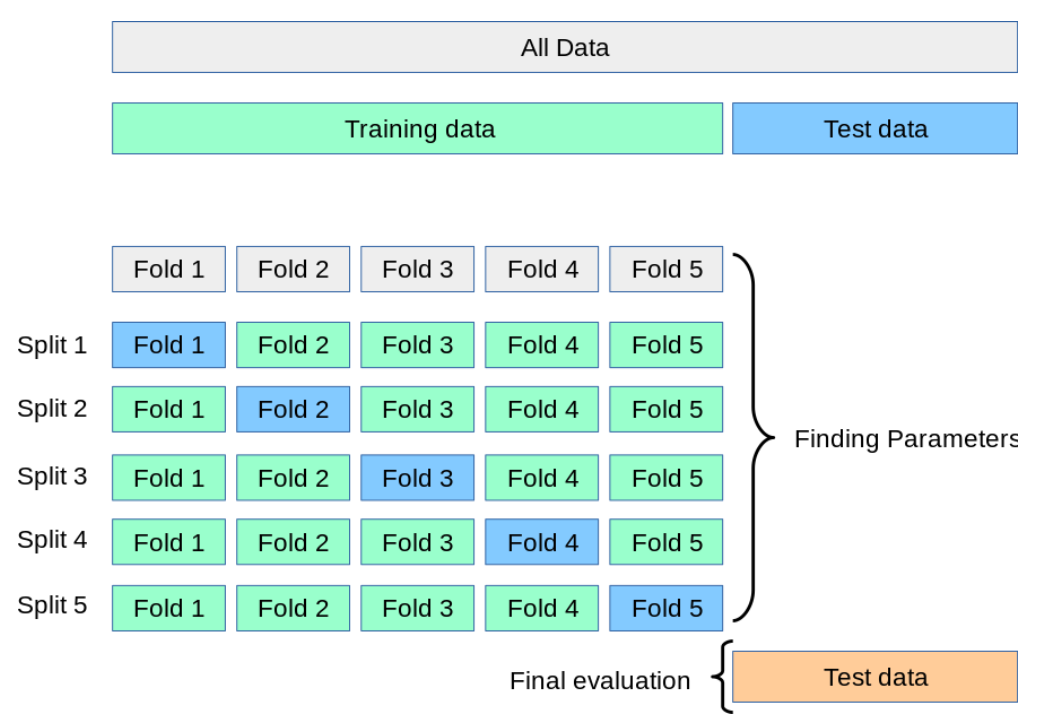
</div>

### `KFold` Class
* **`KFold`** class and function **`cross_val_score`** perform **k-fold cross validation** 
* **`n_splits=10`** specifies the **number of folds**
* **`shuffle=True`** **randomizes** the data before **splitting it into folds** 
	* Particularly **important** if the **samples** might be **ordered** or **grouped**

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

### Calling Function `cross_val_score` to Train and Test Your Model
* The simplest way to use cross-validation is to call the `cross_val_score` helper function on the estimator and the dataset
* **`estimator=knn`** &mdash; **estimator** to validate
* **`X=digits.data`** &mdash; **samples** to use for training and testing
* **`y=digits.target`** &mdash; **target predictions** for the samples
* **`cv=kfold`** &mdash; **cross-validation generator** that defines how to **split** the **samples** and **targets** for training and testing

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=KNeighborsClassifier(), X=digits.data, y=digits.target, cv=kfold)
scores # array of accuracy scores for each fold

In [ ]:
print(f'Mean accuracy: {scores.mean():.2%}')

### Running Multiple Models to Find the Best One
* **Difficult to know in advance** which machine learning model(s) will **perform best for a given dataset**
    * Especially when they hide the details of how they operate
* Even though the **`KNeighborsClassifier`** predicts digit images with a high degree of accuracy, it’s **possible** that other estimators are **even more accurate**
* Let’s **compare** **`KNeighborsClassifier`**, **`SVC`** and **`GaussianNB`**

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
estimators = {
    'KNeighborsClassifier': knn, 
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()}

In [ ]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

### Hyperparameters
There are two parameter types in machine learning

- those the estimator calculates as it learns from the data you provide
- those you specify in advance when you create the scikit-learn estimator object

The parameters specified in advance are called hyperparameters

### Hyperparameter Tuning
* In real-world machine learning studies, you’ll want to **tune hyperparameters** to choose values that produce the **best possible predictions**
* To **determine** the **best value** for **_k_** in the **kNN algorithm**, **try different values** and **compare performance**  
* Scikit-learn also has **automated hyperparameter tuning** capabilities

In [ ]:
accuracy = []

for k in range(1, 20, 2):  # k is an odd value 1-19; odds prevent ties
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, 
        X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')
    accuracy.append(scores.mean())

In [ ]:
plt.plot(range(1, 20, 2), accuracy)
plt.xlim([1, 19])
plt.xlabel('K')
plt.ylabel('Accuracy')

### Tuning the Hyperparameters of an Estimator
- Hyper-parameters are parameters that are not directly learnt within estimators
- In scikit-learn they are passed as arguments to the constructor of the estimator classes
- Two generic approaches to parameter search are provided in scikit-learn: for given values, `GridSearchCV` exhaustively considers all parameter combinations

### Exhaustive Grid Search
- The grid search provided by `GridSearchCV` exhaustively generates candidates from a grid of parameter values specified with the `param_grid` parameter - dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries
- The `GridSearchCV` instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained
- `GridSearchCV` provides the following useful attributes
  - `cv_results_`: A `dict` with keys as column headers and values as columns, that can be imported into a pandas `DataFrame`
  - `best_estimator_`: Estimator that was chosen by the search, i.e. estimator which gave highest score
  - `best_score_`: Mean cross-validated score of the best_estimator

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param = {'n_neighbors': range(1, 20, 2)}
gc = GridSearchCV(knn, param_grid=param, cv=2)
gc.fit(X_train, y_train)
# the score on the test dataset
gc.score(X_test, y_test)

In [ ]:
gc.best_score_

In [ ]:
gc.best_estimator_

In [ ]:
gc.cv_results_

In [ ]:
pd.DataFrame(gc.cv_results_)

### Naive Bayes Classification
Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem. The reason why it is called Naive because it requires rigid independence assumption between input variables (features). This algorithm has been studied extensively since 1960s. Simple though it is, Naive Bayes Classifier remains one of popular methods to solve text categorization problem, the problem of judging documents as belonging to one category or the other, such as email spam detection

The fundamental Naive Bayes assumption is that each feature makes an

- independent
- equal

contribution to the outcome

With relation to our dataset, this concept can be understood as

1. we assume that no pair of features are dependent
2. each feature is given the same weight (or importance)

### Bayesian Classification

Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities. In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$. Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label. Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data. Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier. The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification. Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections

### Case Study

| Features&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | IT (30) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Entertainment (60)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Total (90)
| :-------- | :---- | :---- | :----
| `mall` | 9 | 51 | 60
| `theater` | 8 | 56 | 64
| `paypal` | 20 | 15 | 35
| `tensorflow` | 63 | 0 | 63
| `Total` | 100 | 121 | 221

If a article contains the words "theather", "paypal" and "tensorflow", calculate the probability the article belongs to IT and entertainment categories, respectively

$
P({\rm feature_{i}}~|~L) = \frac{N_{i}}{N}
$

Where $N_{i}$ is the numbers of $feature_{i}$ appears in Label $L$. $N$ is the total numbers of all features occurences under label $L$

$
P(IT~|~{\rm mall, theater, tensorflow}) = P({\rm mall, theater, tensorflow}~|~IT)P(IT) = \frac{8}{100}\times\frac{20}{100}\times\frac{63}{100}\times\frac{30}{90} = 0.00456109
$

$
P(Entertainment~|~{\rm mall, theater, tensorflow}) = P({\rm mall, theater, tensorflow}~|~Entertainment)P(Entertainment) = \frac{56}{121}\times\frac{15}{121}\times\frac{0}{121}\times\frac{60}{90} = 0
$

### Laplace Smoothing
Laplace Smoothing is introduced to solve the problem of zero probability. By applying this method, prior probability and conditional probability can be written as

$$
P({\rm feature_{i}}~|~L) = \frac{N_{i} + \alpha}{N + \alpha m}
$$

Where $m$ is the number of features in the train set. Usually $\alpha$ in the formula equals to 1

Therefore, the previous calculation will be rewritten as

$
P(Entertainment~|~{\rm mall, theater, tensorflow}) = P({\rm mall, theater, tensorflow}~|~Entertainment)P(Entertainment) = \frac{56 + 1}{121 + 1 \times 4}\times\frac{15 + 1}{121 + 1 \times 4}\times\frac{0 + 1}{121 + 1 \times 4}\times\frac{60}{90} = 0.000311296
$

### Multinomial Naive Bayes
In multinomial naive Bayes, the features are assumed to be generated from a simple multinomial distribution. The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified. We discussed the extraction of such features from text in Feature Engineering; here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories

### Case Study: Classifying Text

In [ ]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

For simplicity here, we will select just a few of these categories, and download the training and testing set

In [ ]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Here is a representative entry from the data

In [ ]:
print(train.data[5])

In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data, and predict labels for the test data

In [ ]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator. For example, here is the confusion matrix between the true and predicted labels for the test data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='viridis',
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity. This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for any string, using the `predict()` method of this pipeline. Here's a quick utility function that will return the prediction for a single string

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Let's try it out

In [ ]:
predict_category('sending a payload to the ISS')

In [ ]:
predict_category('discussing islam vs atheism')

In [ ]:
predict_category('determining the screen resolution')

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking. Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective

### When to Use Naive Bayes
Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.
That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful

### Supervised learning Example: Simple linear Regression
As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to `(x,y)` data. We will use the following simple data for our regression example

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

### 1. Choose a Class of Model
In Scikit-Learn, every class of model is represented by a Python class. So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class

In [ ]:
from sklearn.linear_model import LinearRegression

Note that other more general linear regression models exist as well; you can read more about them in the `sklearn.linear_model` module documentation.

### 2. Choose Model Hyperparameters
An important point is that a class of model is not the same as an instance of a model.

Once we have decided on our model class, there are still some options open to us. Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., y-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

These are examples of the important choices that must be made once the model class is selected. These choices are often represented as hyperparameters, or parameters that must be set before the model is fit to data. In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.

For our linear regression example, we can instantiate the `LinearRegression` class and specify that we would like to fit the intercept using the `fit_intercept` hyperparameter

In [ ]:
model = LinearRegression(fit_intercept = True)
model

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values. In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between choice of model and application of model to data

### 3. Arrange Data Into a Features Matrix and Target Vector
Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array. Here our target variable `y` is already in the correct form (a length-`n_samples` array), but we need to massage the data `x` to make it a matrix of size `[n_samples, n_features]`. In this case, this amounts to a simple reshaping of the one-dimensional array

In [ ]:
X = x[:, np.newaxis]
X.shape

In [ ]:
### 4. Fit the Model to Your Data
Now it is time to apply our model to data. This can be done with the `fit()` method of the model

In [ ]:
model.fit(X, y)

This `fit()` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the `fit()` process have trailing underscores; for example in this linear model, we have the following

In [ ]:
model.coef_

In [ ]:
model.intercept_

These two parameters represent the slope and intercept of the simple linear fit to the data. Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

One question that frequently comes up regards the uncertainty in such internal model parameters. In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a statistical modeling question than a machine learning question. Machine learning rather focuses on what the model predicts.

### 5. Predict labels for Unknown Data
Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, this can be done using the `predict()` method. For the sake of this example, our "new data" will be a grid of `x` values, and we will ask what `y` values the model predicts

In [ ]:
xfit = np.linspace(-1, 11)

As before, we need to coerce these x values into a `[n_samples, n_features]` features matrix, after which we can feed it to the model

In [ ]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting first the raw data, and then this model fit

In [ ]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

Typically the efficacy of the model is evaluated by comparing its results to some known baseline, as we will see in the next example

### Supervised learning Example: Iris Classification
Let's take a look at another example of this process, using the Iris dataset we discussed earlier. Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use an extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution (see In Depth: Naive Bayes Classification for more details). Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set. This could be done by hand, but it is more convenient to use the `train_test_split` utility function

In [ ]:
from sklearn.model_selection import train_test_split
# test_size represent the proportion of the dataset to include in the test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, test_size = 0.2, random_state = 1)

With the data arranged, we can follow our recipe to predict the labels

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

Finally, we can use the `accuracy_score` utility to see the fraction of predicted labels that match their true value

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!

### Unsupervised learning Example: Iris Dimensionality
As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it. Recall that the Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis (PCA) which is a fast linear dimensionality reduction technique. We will ask the model to return two components—that is, a two-dimensional representation of the data.

Following the sequence of steps outlined earlier, we have

In [ ]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

Now let's plot the results. A quick way to do this is to insert the results into the original Iris DataFrame, and use Seaborn's `lmplot` to show the results

In [ ]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x = "PCA1", y = "PCA2", hue = 'species', data = iris, fit_reg = False)

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels! This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before

### Unsupervised learning: Iris Clusting
Let's next look at applying clustering to the Iris data. A clustering algorithm attempts to find distinct groups of data without reference to any labels. Here we will use a powerful clustering method called a Gaussian mixture model (GMM). A GMM attempts to model the data as a collection of Gaussian blobs.

We can fit the Gaussian mixture model as follows

In [ ]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components = 3, covariance_type = 'full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

As before, we will add the cluster label to the Iris `DataFrame` and use Seaborn to plot the results

In [ ]:
iris['cluster'] = y_gmm
sns.lmplot(x = "PCA1", y = "PCA2", data = iris, hue = 'species', col = 'cluster', fit_reg = False)

By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the setosa species is separated perfectly within cluster 0, while there remains a small amount of mixing between versicolor and virginica. This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could automatically identify the presence of these different groups of species with a simple clustering algorithm! This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing